In [30]:
import random
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

In [9]:
def get_theoretical_bayes_optimal_loss(d):
    bound = np.sqrt(np.sum([1/i for i in range(1, d+1)]))
    return 1 - norm.cdf(bound)

In [26]:
def get_theoretical_classifier_loss(d, n):
    d_sum = np.sum([1/i for i in range(1, d+1)])
    theta = d_sum/np.sqrt((1+1/n)*d_sum + d/n)
    return 1 - norm.cdf(theta)

In [127]:
def do_bayes_optimal_monte_carlo(d, iterations):
    incorrect = 0
    mu = np.array([1/np.sqrt(i) \
                  for i in range(1, d+1)]).reshape(-1, 1)
    
    for iteration in range(iterations):
        x = None
        true_class = random.choice([0, 1])
        if true_class:
            x = [np.random.normal(loc=-1/np.sqrt(i), scale=1)\
                 for i in range(1, d+1)]
        else:
            x = [np.random.normal(loc=1/np.sqrt(i), scale=1)\
                 for i in range(1, d+1)]
        x = np.array(x).reshape(-1, 1)
        
        predicted_class = None
        if x.T.dot(mu)>0:
            predicted_class = 0
        else:
            predicted_class = 1
            
        if predicted_class != true_class:
            incorrect+=1
            
    return incorrect/iterations

In [149]:
def do_bayes_plugin_monte_carlo(d, n, classifier_iterations, test_set_iterations):
    incorrect = 0
    
    for _ in range(classifier_iterations):
        
        training_samples = [None for _ in range(n)]
        for training_iter in range(n):
            training_samples[training_iter] = [np.random.normal(loc=1/np.sqrt(i), scale=1)\
                                               for i in range(1, d+1)]
        training_samples = np.stack(training_samples)
        mu_hat = np.mean(training_samples, axis=0)

        for iteration in range(test_set_iterations):
            x = None
            true_class = random.choice([0, 1])
            if true_class:
                x = [np.random.normal(loc=-1/np.sqrt(i), scale=1)\
                     for i in range(1, d+1)]
            else:
                x = [np.random.normal(loc=1/np.sqrt(i), scale=1)\
                     for i in range(1, d+1)]
            x = np.array(x).reshape(-1, 1)

            predicted_class = None
            if x.T.dot(mu_hat)>0:
                predicted_class = 0
            else:
                predicted_class = 1

            if predicted_class != true_class:
                incorrect+=1

    return incorrect/(classifier_iterations * test_set_iterations)

In [150]:
xs = [10**i for i in range(5)]
theoretical_bayes_optimal_loss = [get_theoretical_bayes_optimal_loss(x)\
                                  for x in xs]

theoretical_classifier_loss = [get_theoretical_classifier_loss(x, 2)\
                               for x in xs]

mc_bayes_optimal_loss = [do_bayes_optimal_monte_carlo(x, 250)\
                         for x in xs]

mc_bayes_plugin_loss = [do_bayes_plugin_monte_carlo(x, 2, 100, 100)\
                        for x in xs]

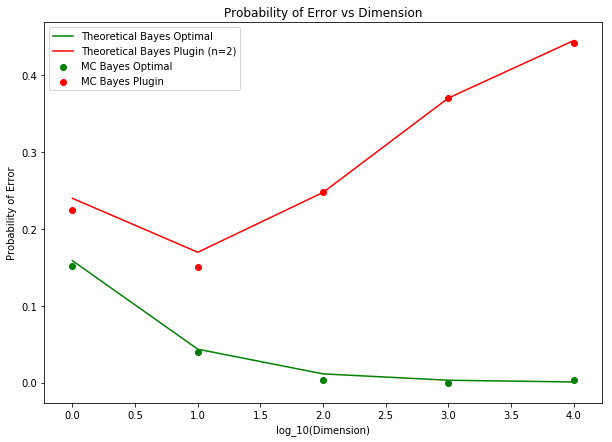

In [151]:
plt.figure(figsize=(10, 7))
plt.plot(np.log10(xs), theoretical_bayes_optimal_loss, c='g', label='Theoretical Bayes Optimal')
plt.plot(np.log10(xs), theoretical_classifier_loss, c='r', label='Theoretical Bayes Plugin (n=2)')
plt.scatter(np.log10(xs), mc_bayes_optimal_loss, c='g', label='MC Bayes Optimal')
plt.scatter(np.log10(xs), mc_bayes_plugin_loss, c='r', label='MC Bayes Plugin')
plt.title('Probability of Error vs Dimension')
plt.ylabel('Probability of Error')
plt.xlabel('log_10(Dimension)')
plt.legend()
plt.show()